# Gráficas

## Primitivas gráficas

Podemos combinar en un gráfico imágenes, puntos, polilíneas, etc.

In [1]:
import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt
import skimage.io        as io

(600, 800, 3)


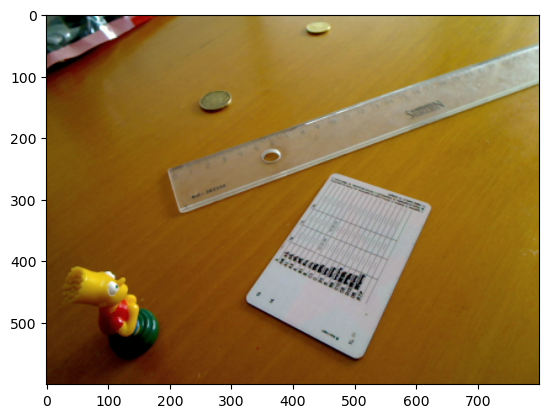

In [2]:
img = io.imread('../images/coins.png')

print(img.shape)
plt.imshow(img)

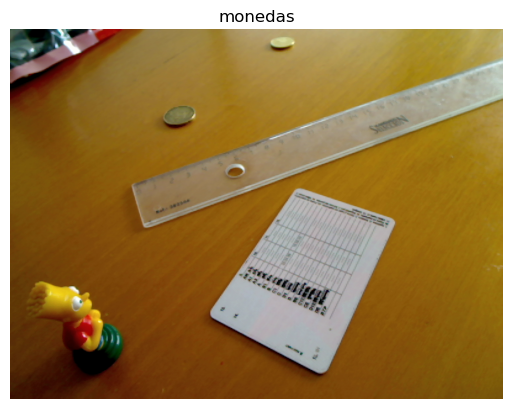

In [3]:
plt.imshow(img)
plt.title('monedas'); plt.axis('off');

In [ ]:
plt.imshow(img);

# dibujamos polígonos y puntos
plt.plot([100,100,200,150,100]
        ,[100,200,200, 50,100],color='orange');

plt.plot([500,600,300]
        ,[100,150,400],'.',color='red')

plt.plot([100,200],[300,300],'.',color='yellow',markersize=15);
plt.plot([400,500,600,400],[400,400,200,400],color='blue',lw=3,ls='dashed');

In [ ]:
# muestramos la imagen completa
plt.imshow(img);

# guardamos los límites para luego
ax = plt.axis()
print(ax)

# extraemos un rectángulo del array de imagen
reg = img[400:,:200]

# lo modificamos
reg[150:170 , 50:70 , :] = 0,255,0

# y lo situamos en la figura en la zona deseada
plt.imshow(reg, extent=[400,700,500,400])

# recuperamos los límites de la figura,
# porque el último imshow los cambia.
plt.axis(ax);

# podemos elegir los límites como deseemos
# plt.axis([0,1000,0,1000]);

El trozo de imagen extraído es una referencia y sus modificaciones se producen realmente en la imagen original:

In [ ]:
plt.imshow(img);

Para evitarlo podemos hacer `reg = img[400:,:200].copy()`.

## Guardar imágenes

Con `plt.savefig` podemos guardar la gráfica completa, y con `io.imsave` guardamos un array de imagen.

In [ ]:
# plt.savefig('result.pdf')  # o .svg, .png, .jpg, etc.
# io.imsave('result.png', img)

## OpenCV

Matplotlib es apropiado para crear figuras de gran calidad en libros, artículos, etc. Pero para visualizar información en vivo es más eficiente usar las primitivas gráficas de opencv. Estas funciones modifican destructivamente un array de imagen, por lo que hay que manejarlas con cuidado.

In [ ]:
cv.circle(img,(600,200),80,(255,0,0),2)
cv.line(img,(50,100),(700,500),(0,0,255),1,cv.LINE_AA)

poly = np.array([[100,300],
                 [200,200],
                 [300,500]])
cv.polylines(img, [ poly ], isClosed= True, color=(0,255,0), thickness= 2, lineType=cv.LINE_AA )

plt.figure(figsize=(8,6))
plt.imshow(img);

Es importante recordar que opencv lee y escribe imágenes en orden BGR, mientras que matplotlib y skimage usan RGB.

In [ ]:
img = cv.imread('../images/coins.png')
plt.imshow(img);

In [ ]:
imgrgb = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(imgrgb);

## Conversión a monocromo y colormap

In [ ]:
g = cv.cvtColor(img,cv.COLOR_RGB2GRAY)
g.shape

In [ ]:
plt.imshow(g);

Las imágenes monocromas (un solo canal), se muestran con un mapa de color que por omisión no es muy bonito. Podemos cambiarlo.

In [ ]:
plt.imshow(g,'coolwarm');

In [ ]:
plt.imshow(g,'gray');

In [ ]:
plt.imshow(255-g,'gray');

In [ ]:
plt.set_cmap('gray'); # fijamos el colormap

plt.imshow(g);

## Imagen como superficie

In [ ]:
np.meshgrid(np.arange(5),np.arange(4))

In [ ]:
np.mgrid[0:4 , 0:5]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

r,c = g.shape
x,y = np.meshgrid(np.arange(c), np.arange(r))

# la coordenada z del gráfico 3D es el nivel de gris de la imagen anterior.
z = g

ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)

Con el mapa de color `cmap='gray'` y mirando desde arriba se ve la imagen original. 

Rearrancando con `%matplotlib notebook` las gráficas se pueden modificar interactivamente dentro del notebook, aunque no va muy ágil. Con `%matplotlib qt` o `%matplotlib tk` salen en una ventana aparte igual que en las aplicaciones normales de escritorio.

Otra forma de cambiar el punto de vista dinámicamente es la opción `%matplolib widget` del paquete `ipympl`, que permite interactuar dinámicamente con matplotlib dentro de los notebooks.

In [ ]:
# !pip install ipympl
# cierra jupyter y vuelve a entrar

In [ ]:
%matplotlib widget

import numpy             as np
import cv2               as cv
import matplotlib.pyplot as plt

In [ ]:
r = np.linspace(-3,3,40)
x,y = np.meshgrid(r,r)
z = np.exp(-(x**2+y**2)/4)

fig = plt.figure(figsize=(6,4))
plt.subplots_adjust(top=1)
if True:
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.capture_scroll = False
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='coolwarm', linewidth=0);
ax.view_init(60, 20)
plt.suptitle('Example of interactive plot')
plt.show()

## Vector field

In [ ]:
# ejemplo de quiver

img = io.imread('../images/cube3.png')

x1 = np.array([100,200,600])
y1 = np.array([400,400,300])

x2 = np.array([50,100,-100])
y2 = np.array([100,100,200])

plt.figure(figsize=(9,6))
plt.imshow(img)
plt.quiver(x1, y1, x2, y2, color='Red',
           width=0.003, scale=1, scale_units='xy');
plt.grid()

## OpenGL

Para crear efectos 3D lo ideal es utilizar bibliotecas gráficas optimizadas.

El ejemplo de código [`surface.py`](../code/surface.py) muestra en vivo la superficie de niveles de gris anterior con la secuencia de imágenes de la webcam.  En la ventana gráfica podemos hacer zoom y cambiar el punto de vista.

## Animaciones

In [ ]:
%matplotlib widget
import numpy             as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,3))
if True:
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.capture_scroll = False

plt.xlim(( 0, 2*np.pi))
plt.ylim((-1.1, 1.1))
plt.grid()
plt.title('Animación (no es un vídeo pregrabado)')
[line] = plt.plot([], [])

def play():
    x = np.linspace(0,2*np.pi,300)

    def fotograma(t):
        line.set_data(x,np.sin(2*x-t*2*np.pi/100))

    for k in range(100):
        fotograma(2*k)
        fig.canvas.draw()

In [ ]:
play()

## Interacción con ratón y teclado

In [ ]:
%matplotlib widget
import numpy             as np
import matplotlib.pyplot as plt

xs =  []
ys =  []

def update():
    l1.set_data(xs,ys)
    fig.canvas.draw()

def on_click(event):
    if event.button == 3:
        xs.append(xs[0])
        ys.append(ys[0])
    else:
        xs.append(event.xdata)
        ys.append(event.ydata)
    update()

def on_key(event):
    t.set_text(f'Tecla: {event.key}')
    if event.key == 'x':
        del xs[-1]
        del ys[-1]
        update()
    else:
        fig.canvas.draw()

fig = plt.figure(figsize=(5,4))
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.capture_scroll = False

plt.subplots_adjust(top=1)
#plt.suptitle('Interactive plot')
ax = fig.add_subplot(111)
#ax.set_title('click me')

l1, = ax.plot(xs,ys,'.-',markersize=10)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.axis('equal')
ax.grid()
t = ax.text(s='',x=-0.75,y=-0.75)

fig.canvas.set_window_title = "tonto"
plt.show()
cid  = fig.canvas.mpl_connect('button_press_event', on_click)
cid2 = fig.canvas.mpl_connect('key_press_event', on_key)

Esta gráfica es interactiva: Left click: añade punto. Right click: cierra la figura. X: borra el último punto. Q: salir de la figura.

## Cámaras interactivas en el notebook!

In [ ]:
%matplotlib widget
import numpy             as np
import matplotlib.pyplot as plt
import cv2 as cv
from umucv.stream import mkStream

import ipywidgets as widgets

import asyncio

stream = mkStream(dev='0',loop=True)

In [ ]:
fig = plt.figure(figsize=(12,4))

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
fig.canvas.capture_scroll = False

ax = fig.add_axes([-0.25,0,1,1])
im = ax.imshow(np.zeros((480,640)),'gray',vmin=0,vmax=255)
ax.set_axis_off();

ax2 = fig.add_axes([0.55,0.12,0.4,0.8])
ax2.set_title('histogram')
ax2.set_xlabel('gray level')
ax2.set_ylabel('frequency')

width=16

bins = np.arange(0,257,width)
centers = bins[:-1] + width//2

cosa = ax2.bar(centers, centers*0, width=width, edgecolor='black')
ax2.set_xticks(list(np.arange(0,256,64))+[255])
ax2.set_xlim(0,255)
ax2.set_ylim(0,1/255*5)

plt.show()

async def main_loop():
    global stop
    while not stop:

        frame = next(stream)
        x = cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
        im.set_data(x)

        h,b = np.histogram(x, bins, density=True)

        for rect, v in zip(cosa,h):
            rect.set_height(v)

        fig.canvas.draw()

        await asyncio.sleep(0.001)


def stop_clicked(b):
    global stop
    stop = True

stop_button = widgets.Button(description="Stop")
stop_button.on_click(stop_clicked)

def play_clicked(b):
    global stop
    stop = False
    loop = asyncio.get_event_loop()
    loop.create_task(main_loop())

play_button = widgets.Button(description="Play")
play_button.on_click(play_clicked)

display(play_button)
display(stop_button)

## 3D graphics using vispy

In [ ]:
# !pip install vispy jupyter_rfb
# y reinicia jupyter

In [ ]:
import numpy as np

from vispy import app, scene
from vispy.io import imread

canvas = scene.SceneCanvas(keys='interactive', bgcolor='w')
view = canvas.central_widget.add_view()
view.camera = scene.TurntableCamera(up='z', fov=60)

# Add a 3D axis to keep us oriented
axis = scene.visuals.XYZAxis(parent=view.scene)

image1_filename = "/home/brutus/repos/umucv/images/coins.png"
image2_filename = "/home/brutus/repos/umucv/images/monty-python2.jpg"

# Load images
img1 = imread(image1_filename)
img2 = imread(image2_filename)

# Create image visuals
image1 = scene.visuals.Image(img1, parent=view.scene)
image1.transform = scene.MatrixTransform()
image1.transform.scale([1/640.,1/640.,1/640.])
image1.transform.translate([0,0,0.5])

image2 = scene.visuals.Image(img2, parent=view.scene)
image2.transform = scene.MatrixTransform()
image2.transform.scale([1/640.,1/640.,1/640.])
image2.transform.rotate(30,[0,1,0])

sphere = scene.visuals.Sphere(radius=0.25, method='ico',
                              parent=view.scene,
                              edge_color='lightgray')
sphere.transform = scene.MatrixTransform()
sphere.transform.translate([0,0,1])

canvas